In [20]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter


In [12]:
df = pd.read_csv("GoldCoast_network.csv")
df_simple_net = df[["From","To"]]
df_simple_net

,From,To
0,1,1371
1,2,2012
2,3,2402
3,4,1875
4,5,1880
...,...,...
11135,4806,1495
11136,4806,3606
11137,4806,415
11138,4807,1433


In [19]:
G = nx.from_pandas_edgelist(df_simple_net,source = "From", target="To", create_using=nx.DiGraph())
Nodes = G.number_of_nodes()
edges = G.number_of_edges()
Nodes, edges

(4783, 11140)

In [27]:
in_deg = Counter(dict(G.in_degree()).values())
out_deg = Counter(dict(G.out_degree()).values())


In [28]:
def ccdf(dd):
   dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
   ccdf = dd.sort_values(by = "k", ascending = False)
   ccdf["cumsum"] = ccdf["count"].cumsum()
   ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
   ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")
   return ccdf

In [29]:
ccdf_in = ccdf(in_deg)
ccdf_out = ccdf(out_deg)


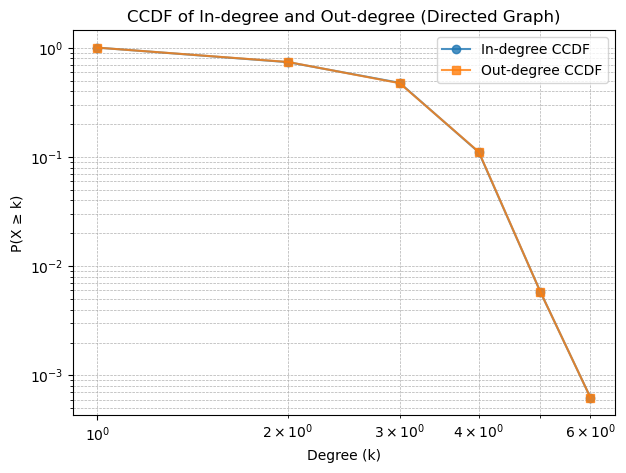

In [30]:
plt.figure(figsize=(7, 5))
plt.plot(ccdf_in["k"], ccdf_in["ccdf"], 'o-', label="In-degree CCDF", alpha=0.8)
plt.plot(ccdf_out["k"], ccdf_out["ccdf"], 's-', label="Out-degree CCDF", alpha=0.8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree (k)")
plt.ylabel("P(X ≥ k)")
plt.title("CCDF of In-degree and Out-degree (Directed Graph)")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

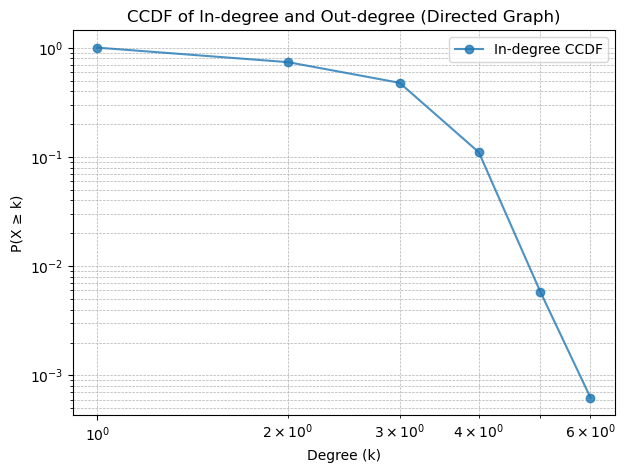

In [31]:
plt.figure(figsize=(7, 5))
plt.plot(ccdf_in["k"], ccdf_in["ccdf"], 'o-', label="In-degree CCDF", alpha=0.8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree (k)")
plt.ylabel("P(X ≥ k)")
plt.title("CCDF of In-degree and Out-degree (Directed Graph)")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()